## Stroke prediction machine learning model and EDA 
Hieronder vind je het logboek behorende bij een data-analyse die zowel **exploratie** als **machine learning** bevat. Het logboek gebruikt een stroke dataset dat word gedocumenteerd en uiteindelijk gebruikt om een machine learning model te trainen. 

De dataset is afkomstig van [kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data) en kan vanuit daar gedownload worden.

Het doel van het onderzoek is het voorspellen of iemand een stroke heeft gehad of niet.

het bestand bevat:

id: unique identifier  
gender: "Male", "Female" or "Other"  
age: age of the patient  
hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
ever_married: "No" or "Yes"  
work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"  
Residence_type: "Rural" or "Urban"  
avg_glucose_level: average glucose level in blood  
bmi: body mass index  
smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"  
stroke: 1 if the patient had a stroke or 0 if not  

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


### import libraries for the EDA

In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Create a codebook for the dataset

In [129]:
# Codebook for the stroke dataset
codebook = {
    "attribute": [
        "Data ID",
        "Gender",
        "Age",
        "Hypertension",
        "Heart Disease",
        "Ever Married",
        "Work Type",
        "Residence Type",
        "Avg Glucose Level",
        "BMI",
        "Smoking Status",
        "Stroke"
    ],
    "unit": ["-", "-", "years", "-", "-", "-", "-", "-", "mg/dL", "kg/m^2", "-", "-"],
    "dtype": ["int64", "category", "int64", "int64", "int64", "category", "category", "category", "float64", "float64", "category", "int64"],
    "description": [
        "Unique identifier for each data entry",
        "Gender of the individual (Male/Female)",
        "Age of the individual in years",
        "Whether the individual has hypertension (0 = No, 1 = Yes)",
        "Whether the individual has heart disease (0 = No, 1 = Yes)",
        "Whether the individual has ever been married (Yes/No)",
        "Type of work the individual is engaged in",
        "Type of residence (Urban/Rural)",
        "Average glucose level in the blood",
        "Body Mass Index (BMI) of the individual",
        "Smoking status of the individual",
        "Whether the individual had a stroke (0 = No, 1 = Yes)"
    ]
}



Data inlezen

In [130]:
# read stroke file
stroke=pd.read_csv('stroke.csv')
# show stroke file
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [131]:
# look how many lines and columns there are.
stroke.shape

(5110, 12)

de dataset heeft 5110 lines en 12 kolommen.

In [132]:
# look if the data types are right
pd.DataFrame({
    "dtypes": stroke.dtypes
})

,dtypes
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


Alle datatypes kloppen en hoeven nog niet aangepast te worden.

## EDA univariaat

Zijn er na's in de file

In [133]:
pd.DataFrame({
    "isna": stroke.isna().sum()
})

,isna
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


bmi heeft 201 na's in de file dat is niet goed hier kun je een aantal dingen tegen doen.  
de data verwijderen  of een gemiddelde bmi en de na's geven.  
verder in de eda laat ik zien wat ik hier heb gedaan.

Maak een soort samenvatting van de data hoe de waardes eruit zien.

In [134]:
# make a summary of the data
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


De gemiddeldes zien er goed uit voor de bmi avg_glucose en age.  
De max van de bmi is aan de hoge kant als je een bmi van hoger dan 40 hebt zit je in obese klasse 3 waardoor 97.6 niet realistisch lijkt ook de min bmi is laag maar mogelijk.  
De rest ziet er goed uit en is mogelijk.

## plots

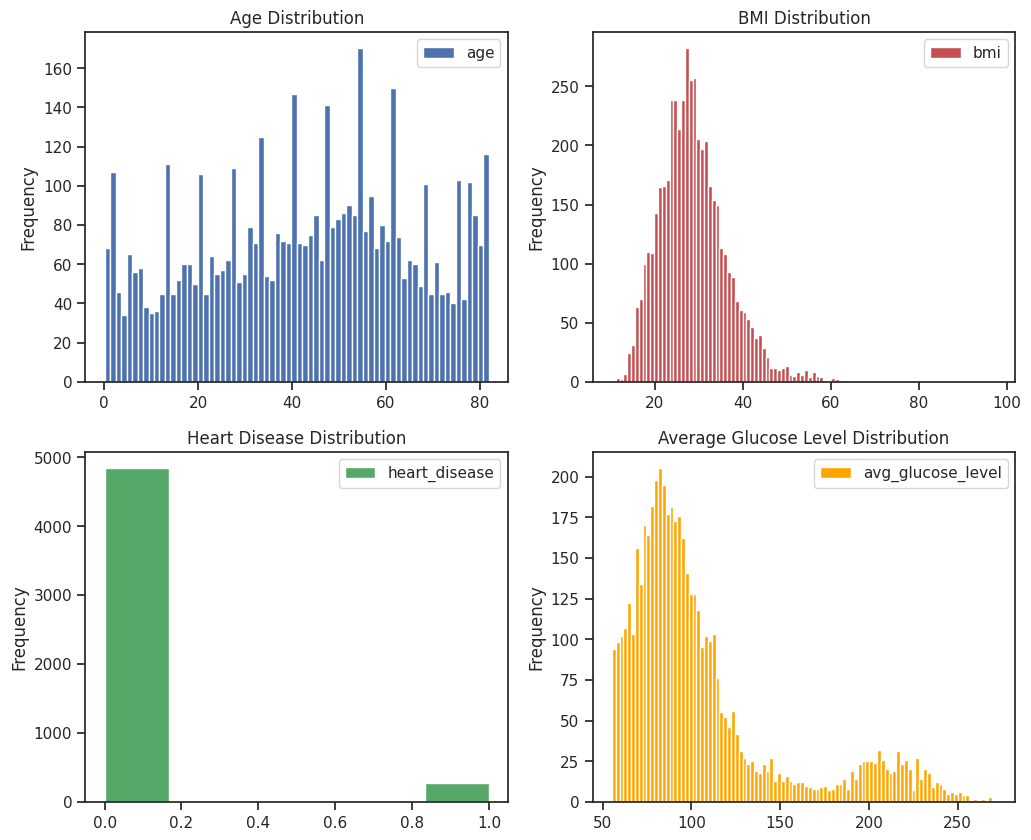

In [135]:
# Create subplots with 2 rows, 2 columns, and a figure size of (12, 10)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot a histogram of the 'age' column in the first subplot (top-left)
stroke.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
axes[0][0].set_title('Age Distribution')  # Set subplot title

# Plot a histogram of the 'bmi' column in the second subplot (top-right)
stroke.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
axes[0][1].set_title('BMI Distribution')  # Set subplot title

# Plot a histogram of the 'heart_disease' column in the third subplot (bottom-left)
stroke.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
axes[1][0].set_title('Heart Disease Distribution')  # Set subplot title

# Plot a histogram of the 'avg_glucose_level' column in the fourth subplot (bottom-right)
stroke.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
axes[1][1].set_title('Average Glucose Level Distribution')  # Set subplot title

# Display the subplots
plt.show()

De leeftijdsverdeling ziet er goed uit.
Ik vermoed dat er uitschieters zijn in de BMI.
De distributie van de gemiddelde glucosespiegel lijkt redelijk, omdat het normale gemiddelde van bloedsuiker minder dan 140 is. Het is echter mogelijk dat deze functie niet nuttig is om te bepalen of er een correlatie bestaat tussen diabetes en beroertes.

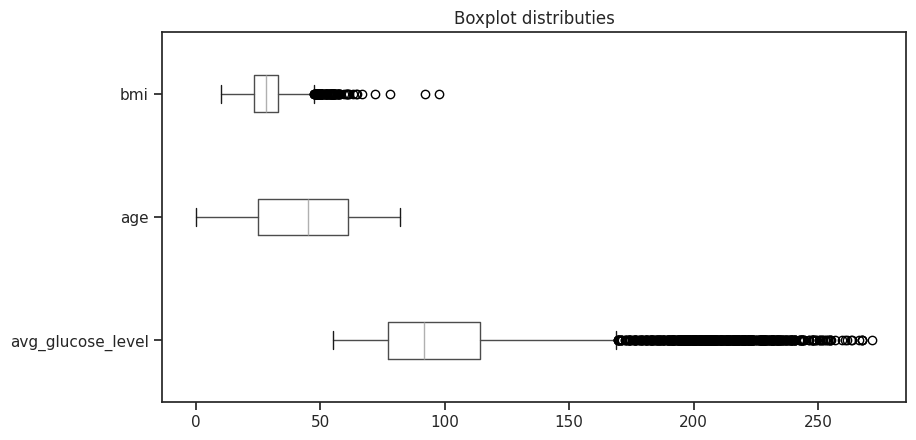

In [136]:
# Select the specific columns for the boxplot
columns_of_interest = ['avg_glucose_level', 'age', 'bmi']

# Create a boxplot for the selected columns
axs = stroke[columns_of_interest].boxplot(grid=False, vert=False, figsize=(9.6, 4.8))

# Set the title for the boxplot
axs.set_title("Boxplot distributies")

# Display the boxplot
plt.show()

hier zie je hetzelfde als in de barplots

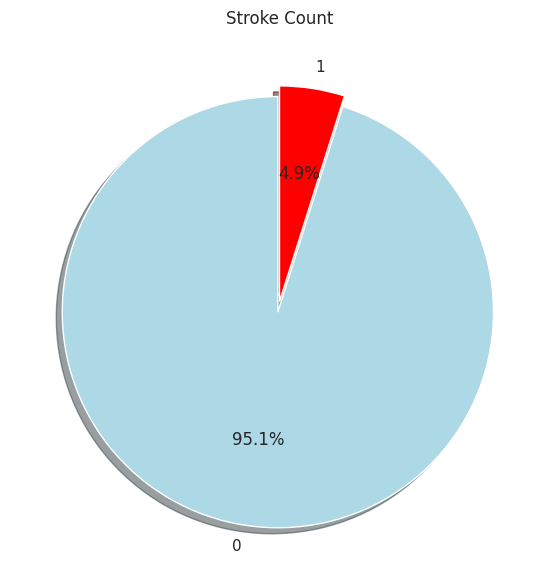

In [137]:
# Get the unique values and their counts from the 'stroke' column
labels = stroke['stroke'].value_counts(sort=True).index
sizes = stroke['stroke'].value_counts(sort=True)

# Define colors for the pie chart segments
colors = ["lightblue", "red"]

# Specify the extent to which each segment should be offset from the center
explode = (0.05, 0)

# Create a pie chart with the specified parameters
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Set the title for the pie chart
plt.title('Stroke Count')

# Display the pie chart
plt.show()

Hier zie je dat het aantal strokes laag is wat problemen kan veroorzaken bij het maken van een machine learning algorime.  
Hier gaat later iets gedaan aan moeten worden.

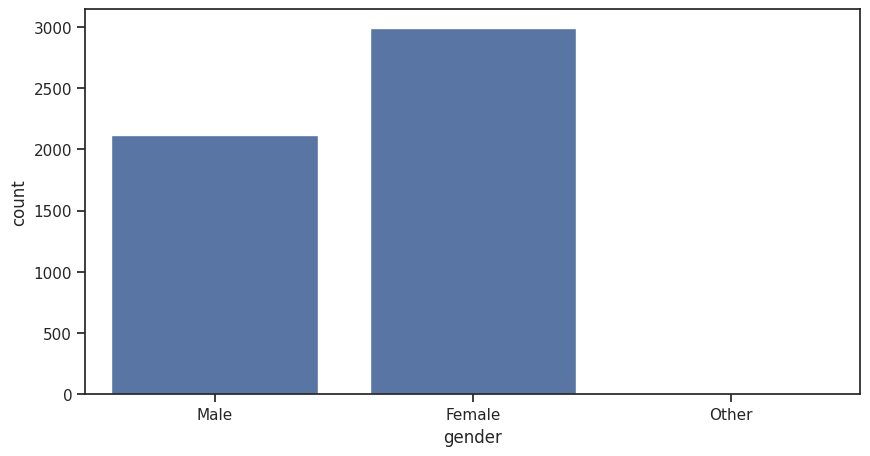

In [138]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'gender' in the 'stroke' dataset
sns.countplot(data=stroke, x='gender')

# Display the plot
plt.show()

De man vrouw verdeling ziet er goed uit.

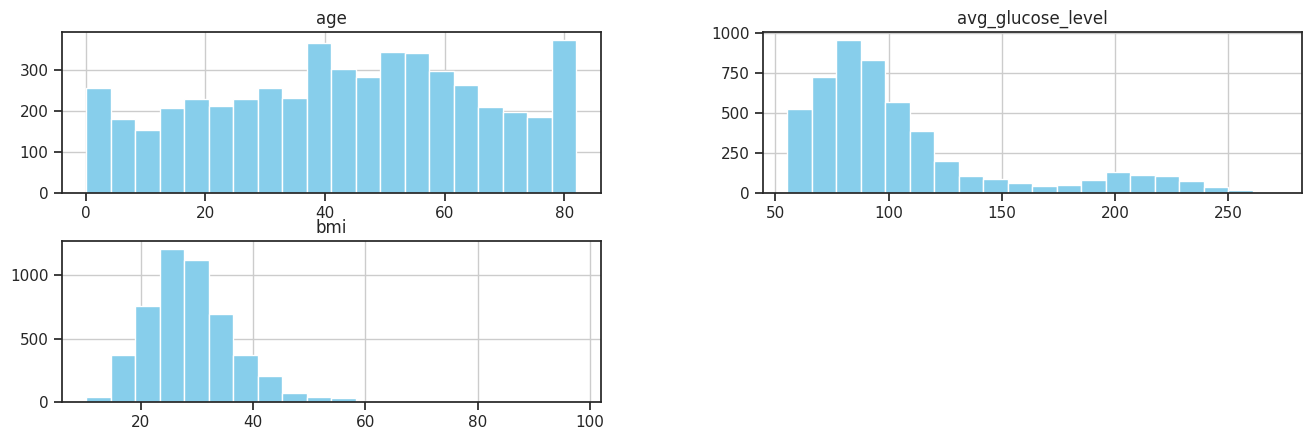

In [139]:
# Select specific columns ('age', 'avg_glucose_level', 'bmi') from the 'stroke' dataset
selected_columns = stroke[['age', 'avg_glucose_level', 'bmi']]

# Plot histograms for the selected columns with specified parameters
selected_columns.hist(bins=20, figsize=(16.0, 4.8), color='skyblue')

# Display the plot
plt.show()


Hier zie je de verdeling van de age bmi en avg glucose level op een zichtbaardere manier

/tmp/ipykernel_808949/4109932456.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['bmi'], color='red')


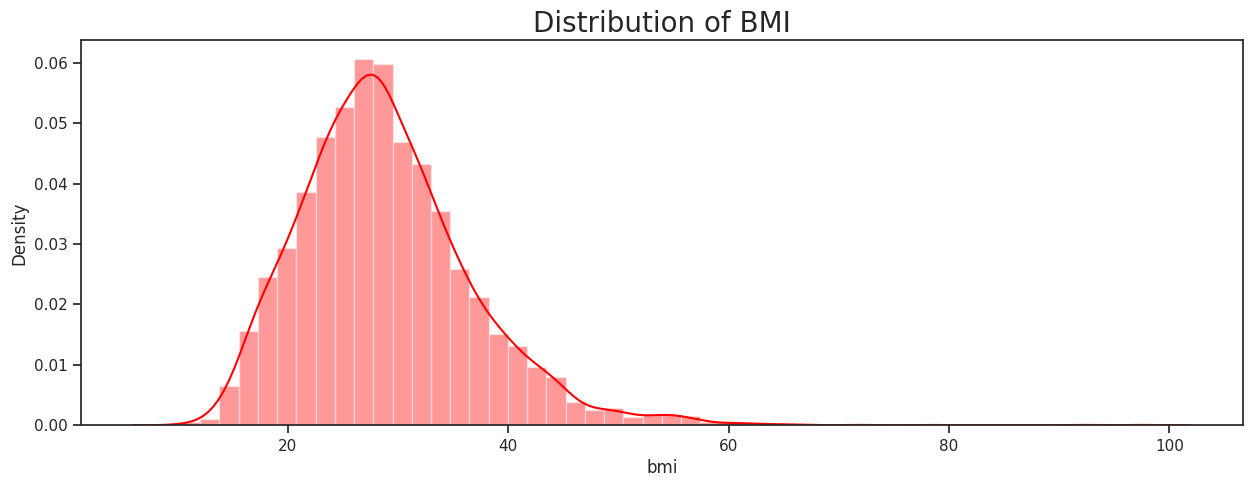

In [140]:
# Set up a subplot with a specific size for the plot
plt.subplots(figsize=(15, 5))

# Use Seaborn to plot the distribution of the 'bmi' column using a histogram
sns.distplot(stroke['bmi'], color='red')

# Set the title for the plot
plt.title('Distribution of BMI', fontsize=20)

# Display the plot
plt.show()


De distibutie van de bmi zie je hier nog beter.

/tmp/ipykernel_808949/1496144591.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['avg_glucose_level'], color='cyan')


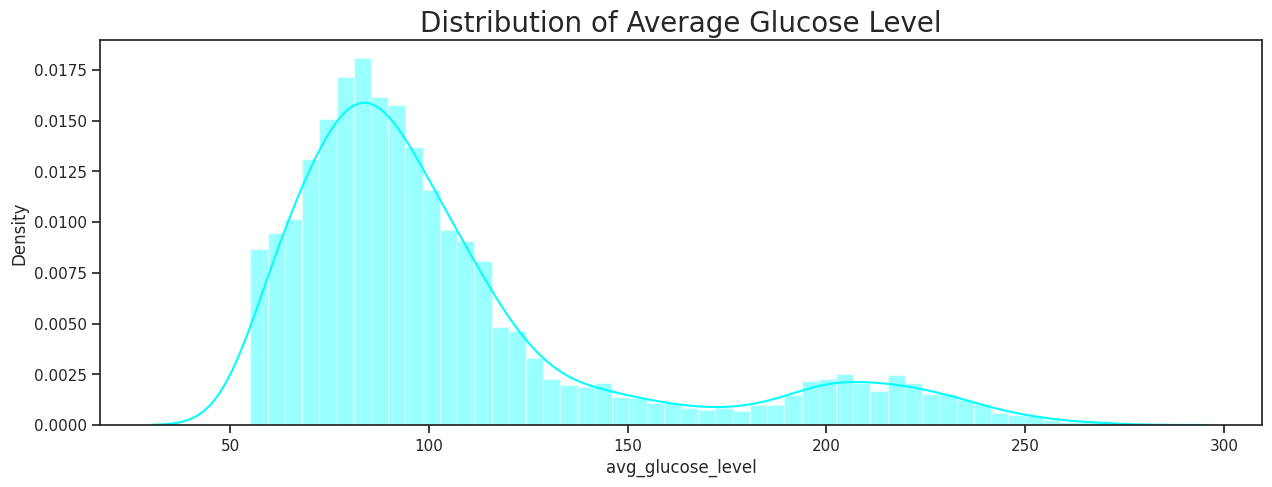

In [141]:
# Set up a subplot with a specific size for the plot
plt.subplots(figsize=(15, 5))

# Use Seaborn to plot the distribution of the 'avg_glucose_level' column using a histogram
sns.distplot(stroke['avg_glucose_level'], color='cyan')

# Set the title for the plot
plt.title('Distribution of Average Glucose Level', fontsize=20)

# Display the plot
plt.show()


De avg mg/dl is onder de 140 dus dat klopt ook zie je in de dataset dat er veel mensen zijn met een hoge bmi die een hoge glucose level kunenn hebben.

## bivariaat

/tmp/ipykernel_808949/3054830943.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stroke['age'], color='cyan')


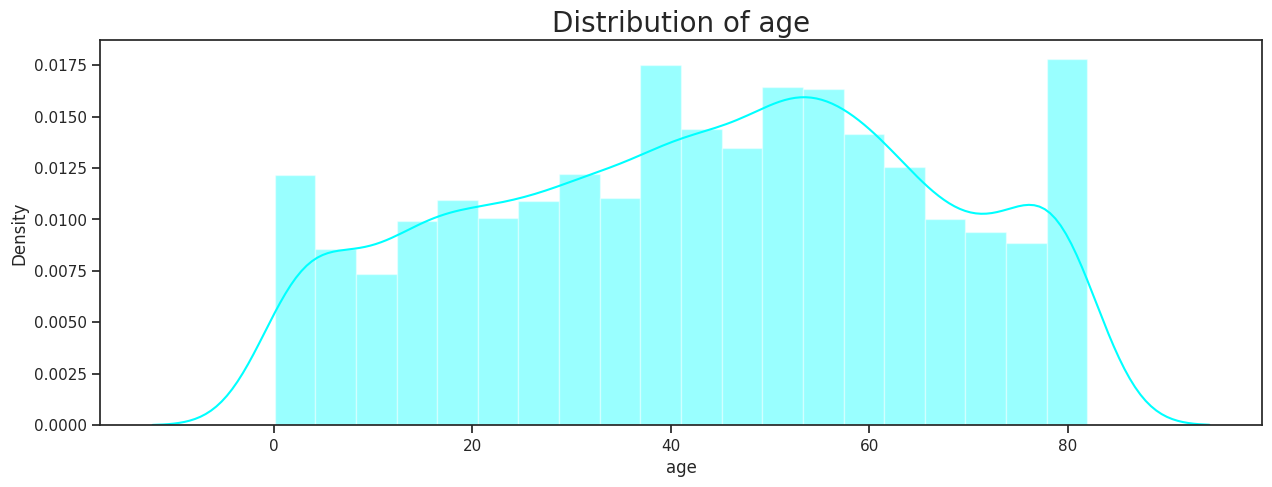

In [174]:
# Set up a subplot with a specific size for the plot
plt.subplots(figsize=(15, 5))

# Use Seaborn to plot the distribution of the 'age' column using a histogram
sns.distplot(stroke['age'], color='cyan')

# Set the title for the plot
plt.title('Distribution of age', fontsize=20)

# Display the plot
plt.show()


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
stroke.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
stroke.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()



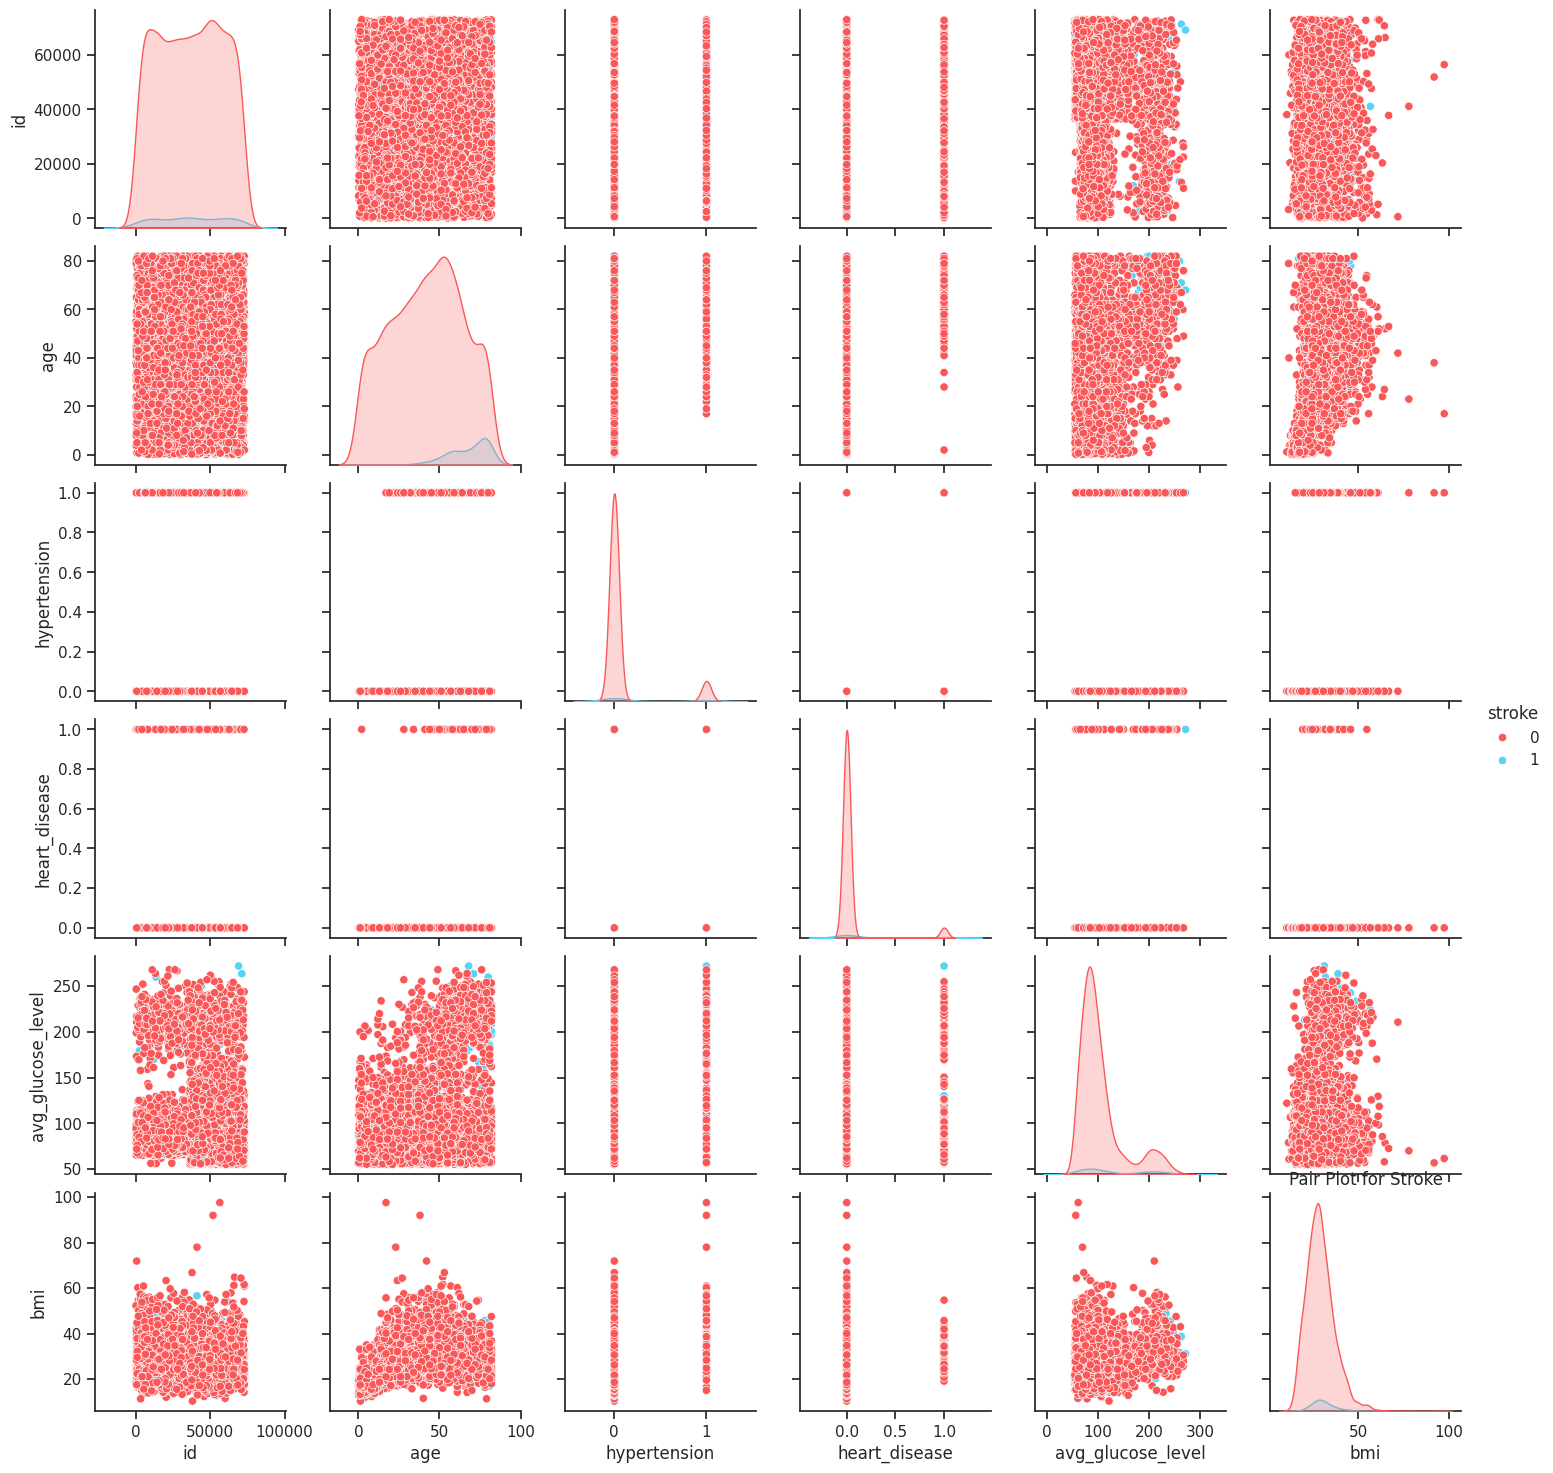

In [143]:
# Set the Seaborn style to 'ticks'
sns.set(style="ticks")

# Define a color palette with two colors for the pair plot
pal = ["#FA5858", "#58D3F7"]

# Create a pair plot using Seaborn to visualize relationships between variables, with hue based on the 'stroke' column
sns.pairplot(stroke, hue="stroke", palette=pal)

# Set the title for the pair plot
plt.title("Pair Plot for Stroke")

# Display the pair plot
plt.show()


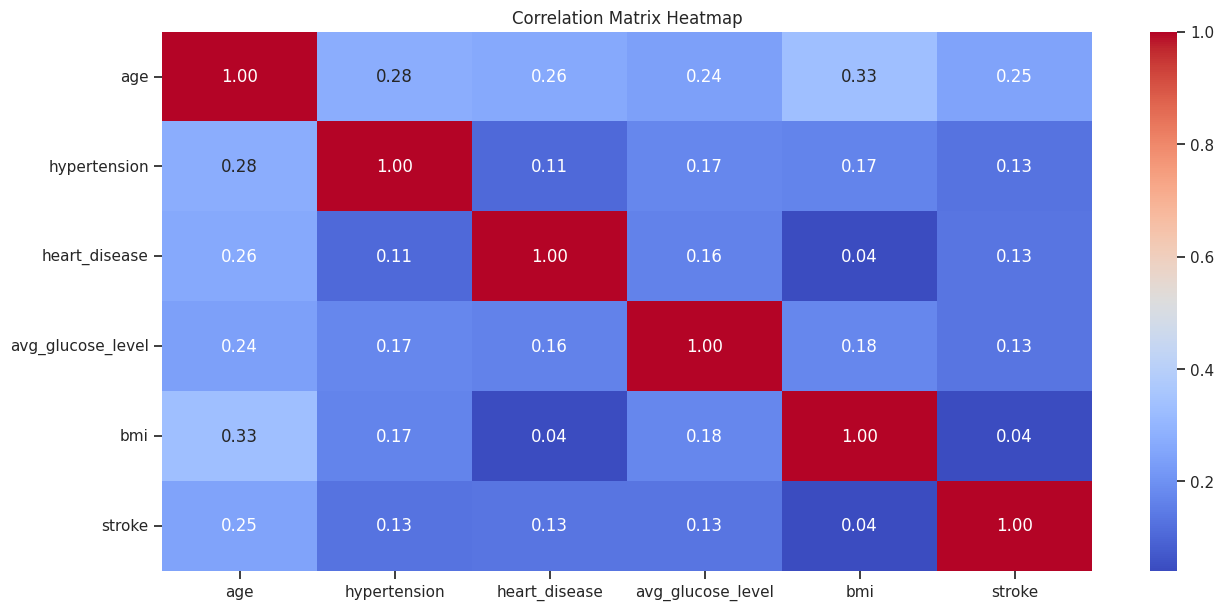

In [144]:
# Select numerical columns for correlation analysis
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Create a subset of the 'stroke' dataset containing only the selected numerical columns
stroke_numeric = stroke[numerical_columns]

# Set the figure size for the heatmap
plt.figure(figsize=(15, 7))

# Use Seaborn to create a heatmap of the correlation matrix for the numerical columns
sns.heatmap(stroke_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Set the title for the heatmap
plt.title("Correlation Matrix Heatmap")

# Display the heatmap
plt.show()



BMI heeft veel outliers fixen 

In [145]:
# Identify outliers in the 'bmi' column by selecting rows where 'bmi' is greater than 50
bmi_outliers = stroke.loc[stroke['bmi'] > 50]

# Display the shape (number of rows) of the subset containing 'bmi' outliers
bmi_outliers_shape = bmi_outliers['bmi'].shape


In [146]:
# mean with outliers 
print(bmi_outliers['stroke'].value_counts())

stroke
0    78
1     1
Name: count, dtype: int64


In [147]:
# fill nas with the mean
stroke['bmi'].fillna(stroke['bmi'].mean(),inplace=True)

/tmp/ipykernel_808949/2149642368.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke['bmi'].fillna(stroke['bmi'].mean(),inplace=True)


In [148]:
# print missing values
print ("\nMissing values :  ", stroke.isnull().sum().values.sum())


Missing values :   0


In [149]:
# Select categorical columns and the 'stroke' column from the 'stroke' dataset
cat_df = stroke[['gender', 'Residence_type', 'smoking_status', 'stroke']]

# Create a summary table by concatenating the cross-tabulations of each categorical column with the 'stroke' column
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])

summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

/tmp/ipykernel_808949/259191733.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok, x='ever_married', palette='inferno')


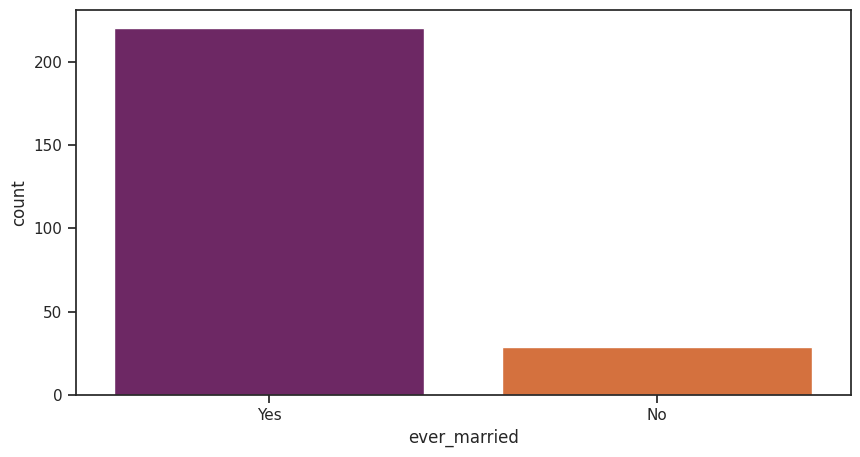

In [150]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Filter the 'stroke' dataset to include only rows where 'stroke' is equal to 1
strok = stroke.loc[stroke['stroke'] == 1]

# Create a count plot using Seaborn to visualize the distribution of 'ever_married' among stroke cases
sns.countplot(data=strok, x='ever_married', palette='inferno')

# Display the plot
plt.show()


/tmp/ipykernel_808949/3967259413.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok, x='work_type', palette='cool')


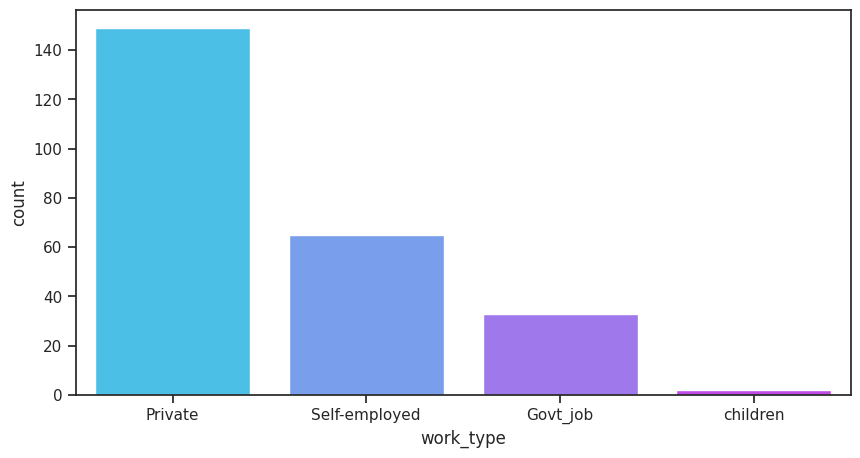

In [151]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'work_type' among stroke cases
sns.countplot(data=strok, x='work_type', palette='cool')

# Display the plot
plt.show()

/tmp/ipykernel_808949/1182935670.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok, x='smoking_status', palette='autumn')


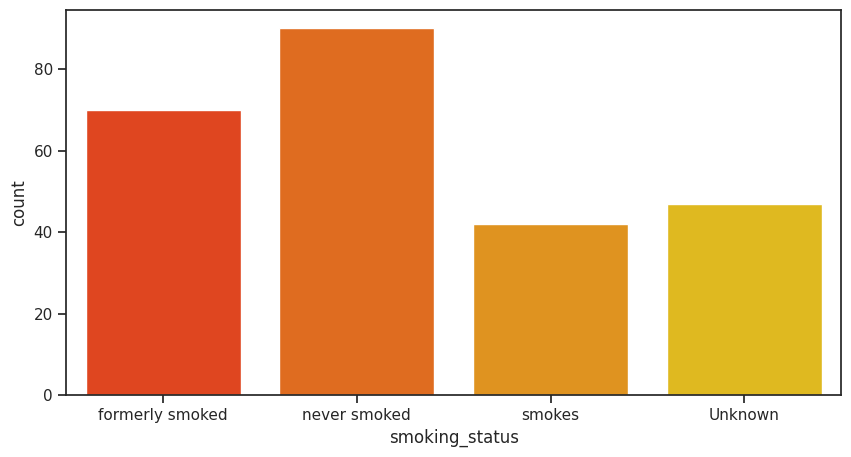

In [152]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'smoking_status' among stroke cases
sns.countplot(data=strok, x='smoking_status', palette='autumn')

# Display the plot
plt.show()


/tmp/ipykernel_808949/385528797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok, x='Residence_type', palette='Greens')


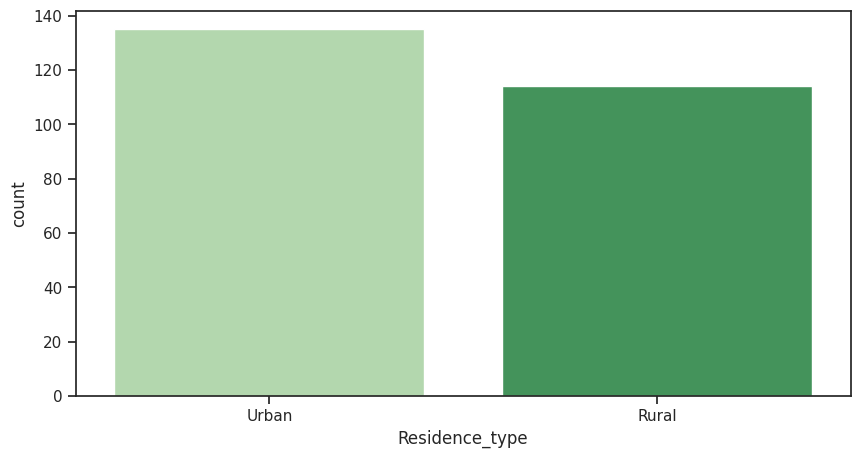

In [153]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'Residence_type' among stroke cases
sns.countplot(data=strok, x='Residence_type', palette='Greens')

# Display the plot
plt.show()


/tmp/ipykernel_808949/904223440.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok, x='heart_disease', palette='Reds')


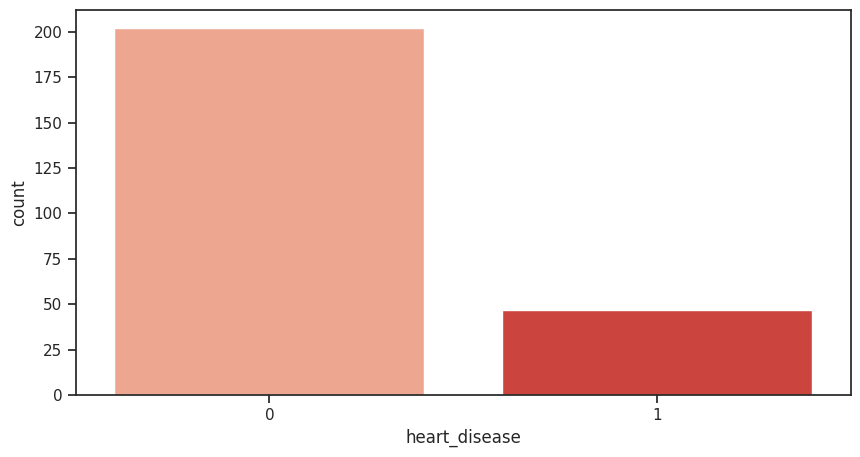

In [154]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'heart_disease' among stroke cases
sns.countplot(data=strok, x='heart_disease', palette='Reds')

# Display the plot
plt.show()


/tmp/ipykernel_808949/1038763459.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=strok, x='hypertension', palette='Pastel2')


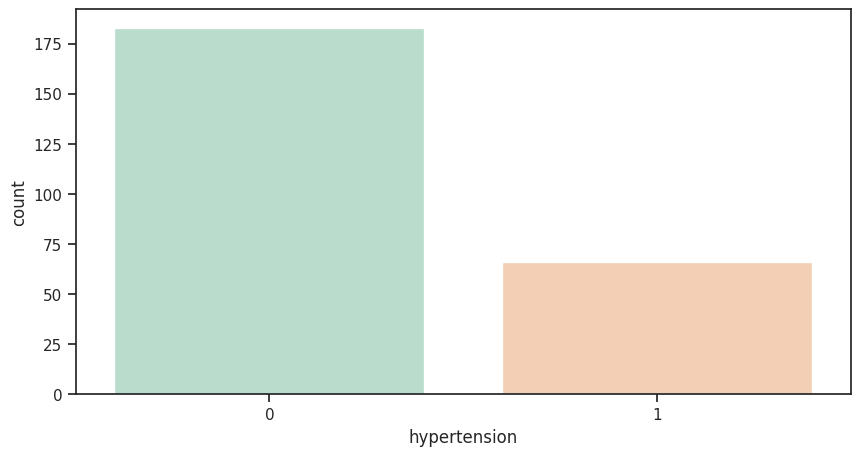

In [155]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot using Seaborn to visualize the distribution of 'hypertension' among stroke cases
sns.countplot(data=strok, x='hypertension', palette='Pastel2')

# Display the plot
plt.show()


In [156]:
# Get the number of unique groups (categories) in the 'stroke' column
Ngroups = stroke["stroke"].nunique()

# Get the total number of observations in the dataset
Ntotal = len(stroke.index)

# Import necessary libraries
from scipy import stats

# Define a function to compute ANOVA statistics for a given attribute
def anova_stats(attribute):
    # Create a list of lists containing the attribute values for each group (stroke category)
    groupdata = [data[attribute].tolist() for _, data in stroke.groupby("stroke")]
    
    # Perform one-way ANOVA test
    F, p = stats.f_oneway(*groupdata)
    
    # Calculate the effect size (η^2)
    η2 = F * (Ngroups-1) / (F * (Ngroups-1) + Ntotal - Ngroups)
    
    return F, p, η2

# Apply the ANOVA function to each numerical attribute in the dataset
anova = {attribute: anova_stats(attribute) for attribute in stroke.select_dtypes(include='number').columns}

# Create a DataFrame to display ANOVA statistics
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T


/tmp/ipykernel_808949/3508471683.py:16: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  F, p = stats.f_oneway(*groupdata)


,$F$,$p$,$\eta^2$
id,0.208459,6.479970e-01,0.000041
age,326.916568,7.030778e-71,0.060151
hypertension,84.953542,4.367557e-20,0.016359
heart_disease,94.698406,3.451927e-22,0.018202
avg_glucose_level,90.503870,2.767811e-21,0.017410
bmi,7.759776,5.361957e-03,0.001517
stroke,inf,0.000000e+00,NaN


In [157]:
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
enc = LabelEncoder()

# Use LabelEncoder to transform categorical variables to numerical values
gender = enc.fit_transform(stroke['gender'])
smoking_status = enc.fit_transform(stroke['smoking_status'])
work_type = enc.fit_transform(stroke['work_type'])
Residence_type = enc.fit_transform(stroke['Residence_type'])
ever_married = enc.fit_transform(stroke['ever_married'])

# Update the 'stroke' DataFrame with the transformed values
stroke['ever_married'] = ever_married
stroke['Residence_type'] = Residence_type
stroke['smoking_status'] = smoking_status
stroke['gender'] = gender
stroke['work_type'] = work_type


In [158]:
# show the heads of the coluns to check if it changed.
stroke[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


### multivariate

In [159]:
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler and use it to scale numerical features in the 'stroke' dataset
scaled = StandardScaler().fit_transform(stroke.select_dtypes(include='number'))


In [160]:
# Import NumPy for mathematical operations
import numpy as np

# Create a DataFrame to display mean and standard deviation for each feature after scaling
statistics_df = pd.DataFrame({
    'mean': np.mean(scaled, axis=0),
    'std': np.std(scaled, axis=0)
}, index=stroke.columns[0:12])


In [161]:
# Import PCA (Principal Component Analysis) from sklearn.decomposition
from sklearn.decomposition import PCA

# Fit PCA on the scaled data
pca = PCA().fit(scaled)

# Transform the scaled data using PCA
components = pca.transform(scaled)

# Iterate over the first 4 principal components
for n in range(4):
    # Create attribute names for the principal components
    attribute = f"PC-{n+1}"
    
    # Add new columns to the 'stroke' DataFrame with the principal component values
    stroke[attribute] = components[:, n]
    
    # Perform ANOVA on the newly added principal component
    anova[attribute] = anova_stats(attribute)


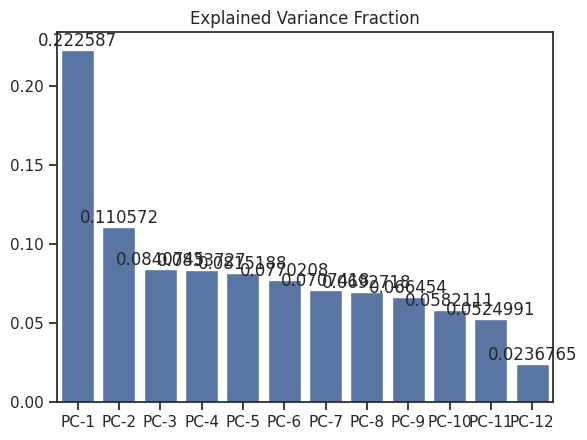

In [162]:
# Create a bar plot to visualize the explained variance ratio for each principal component
axs = sns.barplot(x=[f"PC-{n+1}" for n in range(12)], y=pca.explained_variance_ratio_)

# Add labels to the bars showing the explained variance ratio
axs.bar_label(axs.containers[0])

# Set the title for the bar plot
axs.set_title("Explained Variance Fraction")

# Display the plot
plt.show()


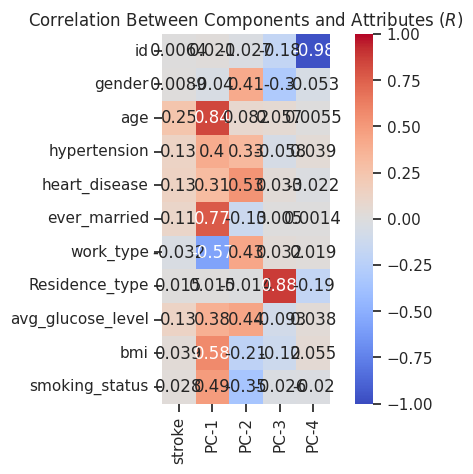

In [163]:
# Create a heatmap to visualize the correlation between principal components and original attributes
axs = sns.heatmap(stroke.corr().iloc[0:11, 11:22], annot=True, cmap="coolwarm", vmin=-1.0, vmax=1.0, square=True)

# Set the title for the heatmap
axs.set_title("Correlation Between Components and Attributes ($R$)")

# Display the heatmap
plt.show()


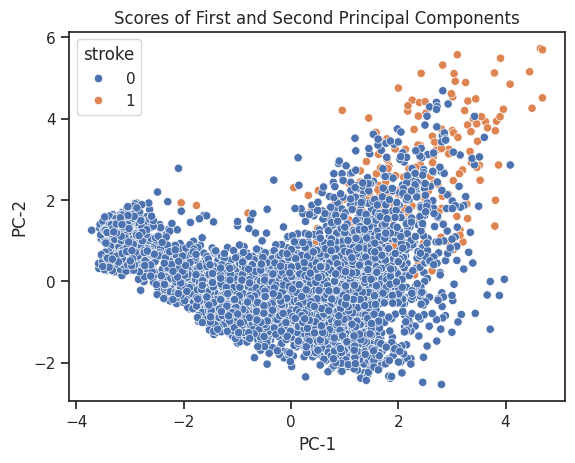

In [164]:
# Create a scatter plot to visualize scores of the first and second principal components
axs = sns.scatterplot(data=stroke, x="PC-1", y="PC-2", hue="stroke")

# Set the title for the scatter plot
axs.set_title("Scores of First and Second Principal Components")

# Display the plot
plt.show()


In [165]:
# Create a DataFrame to display ANOVA statistics for each principal component
pd.DataFrame(anova, index=["$F$", "$p$", "$\eta^2$"]).T


,$F$,$p$,$\eta^2$
id,0.208459,6.479970e-01,0.000041
age,326.916568,7.030778e-71,0.060151
hypertension,84.953542,4.367557e-20,0.016359
heart_disease,94.698406,3.451927e-22,0.018202
avg_glucose_level,90.503870,2.767811e-21,0.017410
bmi,7.759776,5.361957e-03,0.001517
stroke,inf,0.000000e+00,NaN
PC-1,470.945142,5.786238e-100,0.084415
PC-2,1313.456643,3.704618e-256,0.204542
PC-3,391.130225,6.061207e-84,0.071126


In [166]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Create an instance of KMeans with the number of clusters equal to Ngroups
kmeans = KMeans(n_clusters=Ngroups, n_init=100).fit(scaled)

# Add a new column "Cluster" to the 'stroke' DataFrame representing the cluster assignments
stroke["Cluster"] = pd.Categorical(kmeans.labels_ + 1)   # Adding 1 to cluster labels to start from one



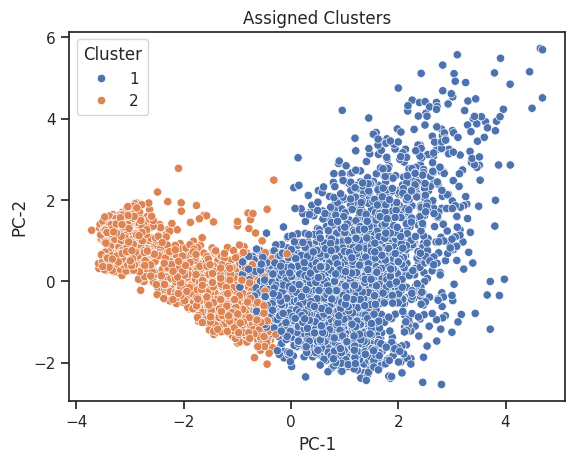

In [167]:
# Create a scatter plot to visualize the assigned clusters based on the first and second principal components
axs = sns.scatterplot(data=stroke, x="PC-1", y="PC-2", hue="Cluster")

# Set the title for the scatter plot
axs.set_title("Assigned Clusters")

# Display the plot
plt.show()


In [168]:
# Create a cross-tabulation to analyze the distribution of stroke cases within each cluster
pd.crosstab(stroke["stroke"], stroke["Cluster"])

Cluster,1,2
stroke,,
0,3326,1535
1,246,3


### data processing

In [169]:
# ID column is not usefull
stroke = stroke.drop('id', axis=1)

In [170]:
# show head to see Id is deleted
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,PC-1,PC-2,PC-3,PC-4,Cluster
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,3.257139,4.884889,1.761248,0.794172,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,1.820197,2.125227,0.275496,-0.674924,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,3.011470,3.703640,0.141355,-0.000406,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,2.265938,1.032082,1.851938,-1.464764,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,2.657212,3.070131,0.690653,1.708558,1


## machine learning 

In [171]:
# Separate features (X) and target variable (y)
X = stroke.drop('stroke', axis=1)  # Features (independent variables)
y = stroke['stroke']                # Target variable (dependent variable)


In [172]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Display the number of transactions in the training and testing sets
print("Number of transactions in X_train dataset: ", X_train.shape)
print("Number of transactions in y_train dataset: ", y_train.shape)
print("Number of transactions in X_test dataset: ", X_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)


Number of transactions in X_train dataset:  (3577, 15)
Number of transactions in y_train dataset:  (3577,)
Number of transactions in X_test dataset:  (1533, 15)
Number of transactions in y_test dataset:  (1533,)


In [173]:
# Import SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

# Display the counts of labels '1' and '0' before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Display the shape of the oversampled training set
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# Display the counts of labels '1' and '0' after oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 173
Before OverSampling, counts of label '0': 3404 

After OverSampling, the shape of train_X: (6808, 15)
After OverSampling, the shape of train_y: (6808,) 

After OverSampling, counts of label '1': 3404
After OverSampling, counts of label '0': 3404


/tmp/ipykernel_808949/219339709.py:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
